In [1]:
# Imports

import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image

In [2]:
# Import the data

train = pd.read_csv('train.csv', encoding='utf-8')

In [3]:
train.shape

(7274, 3)

In [4]:
train.head()

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  Learning ab Google doodles! All doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  This iPhone #SXSW app would b pretty awesome i...          0
4      3604  Line outside the Apple store in Austin waiting...          1

In [5]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [8]:
train.shape

(7273, 3)

In [9]:
# Delete ItemID

#train.drop('ItemID', axis=1, inplace=True)

In [10]:
targetsentiment = train.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
#temp.style.background_gradient(cmap='Purples')
targetsentiment

sentiment  tweet
1          1   4310
2          2   2382
0          0    456
3          3    125

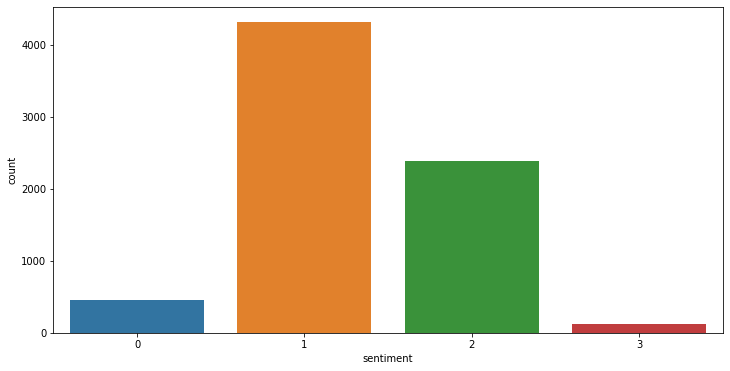

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

In [12]:
fig = go.Figure(go.Funnelarea(
    text =targetsentiment.sentiment,
    values = targetsentiment.tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [13]:
train.head()

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  Learning ab Google doodles! All doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  This iPhone #SXSW app would b pretty awesome i...          0
4      3604  Line outside the Apple store in Austin waiting...          1

In [14]:
import re
from string import punctuation

In [15]:
train['tweet']

0       #sxswnui #sxsw #apple defining language of tou...
1       Learning ab Google doodles! All doodles should...
2       one of the most in-your-face ex. of stealing t...
3       This iPhone #SXSW app would b pretty awesome i...
4       Line outside the Apple store in Austin waiting...
                              ...                        
7269    @mention Google plze Tammi.  I'm in middle of ...
7270    RT @mention ÷¼ Are you all set? ÷_ {link} ÷...
7271    RT @mention Aha! Found proof of lactation room...
7272    We just launched our iPad app at #SXSW! Get al...
7273    The next fin serv battle is vs Apple, GOOG, Mo...
Name: tweet, Length: 7273, dtype: object

In [16]:
all_sentiments1 = '\n'.join(train['tweet'])

In [17]:
all_sentiments1

"#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller\nLearning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw\none of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}\nThis iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork\nLine outside the Apple store in Austin waiting for the new iPad #SXSW  {link}\n#technews One lone dude awaits iPad 2 at Apple\x89Ûªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech\nSXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad\nNU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable\nFree #SXSW sampler on iTunes {link} #FreeMusic\nI think I might go all weekend without seeing th

In [18]:

def remove_hash(text):
    hash_pat = r'#'
    return re.sub(hash_pat, ' ', text)
def remove_mention(text):
    mention_pat = r'@mention|@[a-z]+'
    return re.sub(mention_pat, ' ', text, flags=re.I)
def remove_short_link(text):
    short_link_pat = r"bit\.ly/[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']*"
    return re.sub(short_link_pat, ' ', text, flags=re.I) 
def remove_http_link(text):
    link_permit = r"[a-z0-9/\-:\.=%;,\+\*())&\$!@\[\]#\?~_\.']"
    http_link_pat = r"http[s]?://"+link_permit+"+|//"+link_permit+"+|[\w\.]+\.[a-z]+/"+link_permit+"+" 
    return re.sub(http_link_pat, ' ', text, flags=re.I)
def remove_sub_link(text):
    link_pat = r'{link}'
    return re.sub(link_pat, ' ', text, flags=re.I)
def remove_html_char(text):
    html_char_pat = r'&[a-z]+;'
    return re.sub(html_char_pat, ' ', text, flags=re.I)    
def remove_date(text):
    pipe = r'|'
    date_pat_mon = str()
    months =   [r'January',
                r'February',
                r'March',
                r'April',
                r'May',
                r'June',
                r'July',
                r'August',
                r'September',
                r'October',
                r'November',
                r'December']
    for month in months:
        date_pat_mon = date_pat_mon + month+r' \d\d, \d\d\d\d|'
        date_pat_mon = date_pat_mon + month[:3]+r' \d\d, \d\d\d\d|'
    date_pat_mon = date_pat_mon[:-1]
#     date_pat_mon
    date_pat =  r'\d\d/\d\d/\d\d\d\d|\d\d/\d\d/\d\d' + pipe + \
                r'\d\d\.\d\d\.\d\d\d\d|\d\d\.\d\d\.\d\d' + pipe + \
                r'\d\d-\d\d-\d\d\d\d|\d\d-\d\d-\d\d' + pipe + \
                r'{}'.format(date_pat_mon)
    date_pat = r'{}'.format(date_pat)
    return re.sub(date_pat, ' ', text, flags=re.I)
def remove_short_date(text):
    pipe = r'|'
    short_date_pat = r'[\d]?\d/\d\d[\d\d]?' + pipe + r'[\d]?\d\.\d\d[\d\d]?'
    short_date_pat = r'{}'.format(short_date_pat)
    return re.sub(short_date_pat, ' ', text)
def remove_time(text):
    pipe = r'|'
    time_pat =  r'\d\d:\d\d:\d\d[ ]?pm'+pipe+\
                r'\d\d:\d\d:\d\d[ ]?am'+pipe+\
                r'\d\d:\d\d:\d\d'+pipe+\
                r'\d\d:\d\d:\d\d'+pipe+\
                r'[\d]?\d:\d\d[ ]?pm'+pipe+\
                r'[\d]?\d:\d\d[ ]?am'+pipe+\
                r'[\d]?\d:\d\d'+pipe+\
                r'[\d]?\d:\d\d'+pipe+\
                r'[\d]?\d.\d\d[ ]?pm'+pipe+\
                r'[\d]?\d.\d\d[ ]?am'+pipe+\
                r'[\d]?\d.\d\d'+pipe+\
                r'[\d]?\d.\d\d'
    time_pat= r'{}'.format(time_pat)
    return re.sub(time_pat,' ', text, flags=re.I)

def remove_sxsw(text):
    sxsw_pat = r"sxsw[a-z]*"
    return re.sub(sxsw_pat, ' ', text, flags=re.I) 

def remove_austin_texas(text):
    austin_pat = r"austin"
    texas_pat = r"texas|tx"
    temp = text
    temp = re.sub(austin_pat, ' ', temp, flags=re.I) 
    temp = re.sub(texas_pat, ' ', temp, flags=re.I) 
    return temp
def remove_punctuation(text):
    punctuation_pat_s = r'\'s'
    punctuation_pat_t = r'\'t'
    punctuation_pat_d = r'\'d'
    punctuation_pat_ve = r'\'ve'
    punctuation_pat_ll = r'\'ll'
    temp = text
    temp = re.sub(punctuation_pat_s, ' ', temp, flags=re.I)
    temp = re.sub(punctuation_pat_t, 't', temp, flags=re.I)
    temp = re.sub(punctuation_pat_d, ' would', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ve, ' have', temp, flags=re.I)
    temp = re.sub(punctuation_pat_ll, ' will', temp, flags=re.I)
    return temp
def remove_rt(text):
    rt_pat = r'RT'
    return re.sub(rt_pat, ' ', text)


def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern,'', text)
def remove_not_alnum(text):
    """
    remove everything that is not alpha numeric
    """
    only_text = r'[^a-z0-9 ]'
    return re.sub(only_text, ' ', text, flags=re.I)  



In [19]:

def clean_text(text):
    #replace links witn {link}
    text = remove_short_link(text)
    text = remove_http_link(text)
    #remove {link}
    text = remove_sub_link(text)
    #hash
    text = remove_hash(text)
    #mention
    text = remove_mention(text)
    #rt
    text = remove_rt(text)
    #html spl chars
    text = remove_html_char(text)
    #time
    text = remove_time(text)
    #svxm
    text=remove_sxsw(text)
    #texas
    text=remove_austin_texas(text)
    #date
    text = remove_date(text)
    text = remove_short_date(text)
    #punctuation
    text = remove_punctuation(text)
    #emotjis
    text = remove_emojis(text)
    #remove spl chars
    text = remove_not_alnum(text)
    #return lower
    return text.lower()

In [20]:
train['tweet'] = train['tweet'].apply(lambda x:clean_text(x))

In [21]:
train['tweet']

0              apple defining language of touch with d...
1       learning ab google doodles  all doodles should...
2       one of the most in your face ex  of stealing t...
3       this iphone    app would b pretty awesome if i...
4       line outside the apple store in   waiting for ...
                              ...                        
7269      google plze tammi   i m in middle of    craz...
7270            are you all set             edchat  mu...
7271        aha  found proof of lactation room  excuse...
7272    we just launched our ipad app at     get all t...
7273    the next fin serv battle is vs apple  goog  mo...
Name: tweet, Length: 7273, dtype: object

In [22]:
all_sentiments = '\n'.join(train['tweet'])

In [23]:
all_sentiments

'       apple defining language of touch with different dialects becoming smaller\nlearning ab google doodles  all doodles should be light  funny   innovative  with exceptions for significant occasions   googledoodle   \none of the most in your face ex  of stealing the show in yrs      at     apple schools the mkt experts    \nthis iphone    app would b pretty awesome if it didnt crash every 10mins during extended browsing   fuckit  illmakeitwork\nline outside the apple store in   waiting for the new ipad      \n technews one lone dude awaits ipad 2 at apple   s   store    tech news  apple  ipad 2     tablets  tech\n  tips  prince  npr videos  toy shopping with zuckerberg           ipad\nnu user     new  ubersocial for  iphone now in the app store includes uberguide to    sponsored by  mashable\nfree    sampler on itunes    freemusic\ni think i might go all weekend without seeing the same ipad case twice      \n    official    app      go       android  iphone  ipad\nit  official  i m 

In [24]:
from nltk.corpus import stopwords
import nltk

#from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+['rt']
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]

train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])


In [25]:
train.head()

tweet_id                                              tweet  sentiment  \
0      1701         apple defining language of touch with d...          1   
1      1851  learning ab google doodles  all doodles should...          1   
2      2689  one of the most in your face ex  of stealing t...          2   
3      4525  this iphone    app would b pretty awesome if i...          0   
4      3604  line outside the apple store in   waiting for ...          1   

                                      tokenized_text  
0  [apple, defining, language, touch, different, ...  
1  [learning, ab, google, doodles, doodles, light...  
2  [one, face, ex, stealing, show, yrs, apple, sc...  
3  [iphone, app, would, b, pretty, awesome, didnt...  
4  [line, outside, apple, store, waiting, new, ipad]

In [26]:
from collections import Counter

In [27]:
top= Counter([item for sublist in train['tokenized_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [28]:
temp

Common_words  count
0        google   2114
1          ipad   2010
2         apple   1885
3        iphone   1276
4         store   1205
5             2    934
6           new    864
7           app    673
8       circles    549
9        social    531
10       launch    518
11      android    488
12          pop    487
13        today    465
14      network    372
15        ipad2    369
16          via    340
17         line    325
18         free    322
19          get    321

In [29]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [30]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [31]:
Negative_sent = train[train['sentiment']==0]
Neutral_sent = train[train['sentiment']==1]
Positive_sent = train[train['sentiment']==2]
Canttell_sent = train[train['sentiment']==3]

                     

In [32]:
Negative_sent.head()

tweet_id                                              tweet  sentiment  \
3       4525  this iphone    app would b pretty awesome if i...          0   
24       634     i have a 3g iphone  after 3 hrs tweeting at...          0   
34      1178  so i went the whole day w out my laptop   just...          0   
50      5058       google lost its way by caring too much fo...          0   
63      2435  i composed a tweet so acerbic and cynical abou...          0   

                                       tokenized_text  
3   [iphone, app, would, b, pretty, awesome, didnt...  
24  [3g, iphone, 3, hrs, tweeting, rise, dead, nee...  
34  [went, whole, day, w, laptop, used, ipad, 1, t...  
50  [google, lost, way, caring, much, business, vs...  
63  [composed, tweet, acerbic, cynical, ipad, user...

In [33]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['tokenized_text'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['negative_words','count']
temp_negative.style.background_gradient(cmap='Greens')

In [34]:
fig = px.bar(temp_negative, x="count", y="negative_words", title='Most  negative Words', orientation='h', 
             width=700, height=700,color='negative_words')
fig.show()

In [35]:
fig = px.treemap(temp_negative, path=['negative_words'], values='count',title='Tree of 20  Most negative Words')
fig.show()

In [36]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['tokenized_text'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['positive_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [37]:
fig = px.bar(temp_positive, x="count", y="positive_words", title='Most  positive Words', orientation='h', 
             width=700, height=700,color='positive_words')
fig.show()

In [38]:
fig = px.treemap(temp_positive, path=['positive_words'], values='count',title='Tree of Most positive Words')
fig.show()

In [39]:
#MosT common neutral words
top = Counter([item for sublist in Neutral_sent['tokenized_text'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['neutral_words','count']
temp_neutral.style.background_gradient(cmap='Greens')

In [40]:
fig = px.bar(temp_neutral, x="count", y="neutral_words", title='Most Commmon neutral Words', orientation='h', 
             width=700, height=700,color='neutral_words')
fig.show()

In [41]:
fig = px.treemap(temp_neutral, path=['neutral_words'], values='count',title='Tree of Most neutral Words')
fig.show()

In [42]:
#MosT common canttell words
top = Counter([item for sublist in Canttell_sent['tokenized_text'] for item in sublist])
temp_canttell = pd.DataFrame(top.most_common(20))
temp_canttell.columns = ['canttell_words','count']
temp_canttell.style.background_gradient(cmap='Greens')

In [43]:
fig = px.treemap(temp_canttell, path=['canttell_words'], values='count',title='Tree of Most canttell Words')
fig.show()

In [44]:
fig = px.bar(temp_canttell, x="count", y="canttell_words", title='Most Commmon cant tell Words', orientation='h', 
             width=700, height=700,color='canttell_words')
fig.show()

In [45]:
raw_text = [word for word_list in train['tokenized_text'] for word in word_list]

In [46]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['tokenized_text']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['tokenized_text']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [47]:
Unique_Positive= words_unique(2, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


In [48]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

In [49]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

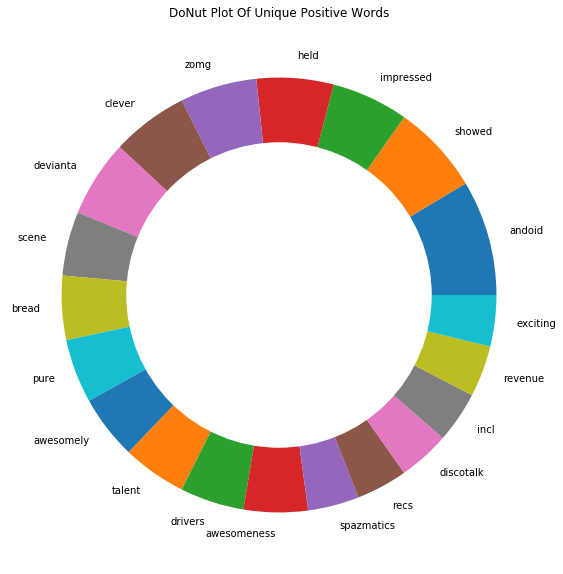

In [50]:
#from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(10,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [51]:
Unique_Neutral= words_unique(1, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='pink')

The top 20 unique words in neutral Tweets are:


In [52]:
fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='Tree Of Unique neutral Words')
fig.show()

In [53]:
Unique_Negative= words_unique(0, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_Negative.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


In [54]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique negative Words')
fig.show()

In [55]:
Unique_canttell= words_unique(3, 20, raw_text)
print("The top 20 unique words in neutral Tweets are:")
Unique_canttell.style.background_gradient(cmap='Greens')

The top 20 unique words in neutral Tweets are:


In [56]:
fig = px.treemap(Unique_canttell, path=['words'], values='count',title='Tree Of Unique canttell Words')
fig.show()

In [57]:
Negative_sent = train[train['sentiment']==0]
Neutral_sent = train[train['sentiment']==1]
Positive_sent = train[train['sentiment']==2]
Canttell_sent = train[train['sentiment']==3]


In [58]:
#import en_core_web_sm
#nlp = en_core_web_sm.load()

In [59]:
import spacy
#from spacy import displacy

nlp = spacy.load("en_core_web_sm")

def spacy_ner(text):
    text = text.replace('\n', ' ')
    doc = nlp(text)
    entities = []
    labels = []
    position_start = []
    position_end = []

    for ent in doc.ents:
        if ent.label_ in ['PERSON','ORG','GPE']:
            entities.append(ent)
            labels.append(ent.label_)
    return entities,labels



C:\Users\viren\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning:

[W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.1). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate



In [60]:
named_entities_negative = Negative_sent['tweet'].apply(lambda x:spacy_ner(x))


In [61]:
def fit_ner(df):
    """The dataframe should have a column named 'text'"""
    print('Fitting Spacy NER model...')
    ner = df['tweet'].apply(spacy_ner)
    ner_org = {}
    ner_per = {}
    ner_gpe = {}

    for x in ner:
        #print(list(x))
        for entity, label in zip(x[0],x[1]):
            #print(type(entity.text))
            if label =='ORG':
                ner_org[entity.text] = ner_org.get(entity.text,0) + 1
            elif label=='PERSON':
                ner_per[entity.text] = ner_per.get(entity.text,0) + 1
            else:
                ner_gpe[entity.text] = ner_gpe.get(entity.text,0) + 1

    return {'ORG':ner_org,'PER':ner_per,'GPE':ner_gpe}

In [62]:
named_entities_negativesentiment = fit_ner(Negative_sent)


Fitting Spacy NER model...


In [63]:
named_entities_negativesentiment['ORG']


{'ipad news apps': 4,
 'iphone gps': 1,
 'the android party': 1,
 'kinda': 2,
 'apple': 21,
 'the classiest fascist company': 1,
 'nyt': 1,
 'white bgr': 1,
 'un': 2,
 'ipad 2': 2,
 'google': 11,
 'bereft wanderer  white cord': 1,
 'mac': 2,
 'bing page rank panel': 1,
 'justin': 1,
 'stupid technology': 1,
 'ipad news': 1,
 'iphone': 1,
 'iphone battery': 1,
 'ipad iphone app    ': 1,
 'prx': 1,
 'microsoft': 3,
 'ppl': 1,
 'snarky': 1,
 'journalsim': 1,
 'success w  ': 1,
 'apple app store': 1,
 'the new york times': 1,
 'el  ': 1,
 'diller': 1,
 'google maps needs': 1,
 'droid     ': 1}

In [64]:
named_entities_negativesentiment['GPE']

{'america': 11,
 'button': 4,
 'japan': 9,
 'app': 1,
 'hilton': 1,
 'san diego': 1,
 'southby': 1,
 'canada': 1,
 'china': 1}

In [65]:
named_entities_positive = Positive_sent['tweet'].apply(lambda x:spacy_ner(x))


In [66]:
named_entities_positivesentiment = fit_ner(Positive_sent)

Fitting Spacy NER model...


In [67]:
named_entities_positivesentiment['PER']

{'app       ': 1,
 'tim soo': 2,
 'jaw dropping  iphone wii': 1,
 'dan bricklin  app notetaker  ': 1,
 'iphone app  ': 3,
 'ipad': 18,
 'droid    ': 1,
 'mobile apps': 2,
 'ipad app': 14,
 'ipad 2': 3,
 'kinda giddy': 1,
 'ipad2  ': 3,
 'dang': 1,
 'app': 2,
 'tomlinson': 3,
 'newsapps': 2,
 'intro  ': 1,
 'mel gibson': 1,
 'ipad apps  ': 3,
 'app  ': 7,
 'dennis crowley': 3,
 'ipad 2  ': 2,
 'cool app    ': 1,
 'dan neumann': 1,
 'ipad app  ': 3,
 'app w  ': 1,
 'groupme': 2,
 'felix da housecat': 1,
 'apple    ': 1,
 'chris tomlinson': 1,
 'ap    ': 1,
 'marissa mayer': 7,
 'sweet        ': 1,
 'mark belinsky': 9,
 'marissa miller': 1,
 'woo hoo    ': 2,
 'app    ': 9,
 'j w  ': 1,
 'barry diller': 3,
 'hooray': 1,
 'pic    ': 2,
 'ipad apps': 5,
 'tapworthy  ': 3,
 'jonathan with zaggle': 1,
 'crowley  ': 1,
 'pandora  youtube  stumbledupon': 1,
 'ipod  ': 1,
 'josh clark': 2,
 'haha  ': 5,
 'ipad 2 queue': 1,
 'andoid app': 8,
 'app  bizzy': 1,
 'lamesauce  cc': 1,
 'clipcon  ': 1,

In [68]:
named_entities_positivesentiment['PER']

{'app       ': 1,
 'tim soo': 2,
 'jaw dropping  iphone wii': 1,
 'dan bricklin  app notetaker  ': 1,
 'iphone app  ': 3,
 'ipad': 18,
 'droid    ': 1,
 'mobile apps': 2,
 'ipad app': 14,
 'ipad 2': 3,
 'kinda giddy': 1,
 'ipad2  ': 3,
 'dang': 1,
 'app': 2,
 'tomlinson': 3,
 'newsapps': 2,
 'intro  ': 1,
 'mel gibson': 1,
 'ipad apps  ': 3,
 'app  ': 7,
 'dennis crowley': 3,
 'ipad 2  ': 2,
 'cool app    ': 1,
 'dan neumann': 1,
 'ipad app  ': 3,
 'app w  ': 1,
 'groupme': 2,
 'felix da housecat': 1,
 'apple    ': 1,
 'chris tomlinson': 1,
 'ap    ': 1,
 'marissa mayer': 7,
 'sweet        ': 1,
 'mark belinsky': 9,
 'marissa miller': 1,
 'woo hoo    ': 2,
 'app    ': 9,
 'j w  ': 1,
 'barry diller': 3,
 'hooray': 1,
 'pic    ': 2,
 'ipad apps': 5,
 'tapworthy  ': 3,
 'jonathan with zaggle': 1,
 'crowley  ': 1,
 'pandora  youtube  stumbledupon': 1,
 'ipod  ': 1,
 'josh clark': 2,
 'haha  ': 5,
 'ipad 2 queue': 1,
 'andoid app': 8,
 'app  bizzy': 1,
 'lamesauce  cc': 1,
 'clipcon  ': 1,

In [69]:
named_entities_positivesentiment['GPE']

{'turkey': 2,
 'japan': 14,
 'la': 1,
 'louisiana': 3,
 'america': 3,
 'dt': 2,
 'discovr': 6,
 'ur city': 1,
 'umm': 1,
 'pakistan': 1,
 'buffalo': 1,
 'soundcloud': 1,
 'hollywood': 1,
 'karateka': 2,
 'us': 7,
 'kick': 1,
 'gettinng': 1,
 'san francisco': 1,
 'the united states': 1,
 'ooooo': 1,
 'usa': 1,
 'hcsm': 1,
 'canada': 1,
 'kawasaki': 1,
 'wisconsin': 1,
 'hilton': 1,
 'california': 2,
 'san jose': 1,
 'san antonio': 1,
 'brazil': 1,
 '3d': 1}

In [70]:
Positive_sent['']

KeyError: ''

In [ ]:
print(nltk.pos_tag(Positive_sent['tokenized_text']))

In [72]:
named_entities_neutral = Neutral_sent['tweet'].apply(lambda x:spacy_ner(x))


In [74]:
named_entities_neutralsentiment = fit_ner(Neutral_sent)

Fitting Spacy NER model...


In [76]:
named_entities_neutralsentiment['GPE']

{'zuckerberg': 2,
 'app': 2,
 '3d': 2,
 'congo': 1,
 'japan': 65,
 'canada': 2,
 'brooklyn': 2,
 'hilton': 6,
 'itashimasu': 1,
 'kxan': 2,
 'powerpad': 1,
 'hcsm': 2,
 'san jacinto': 1,
 'detroit': 1,
 'america': 2,
 'meetchu': 1,
 'patientslikeme': 1,
 'xperia': 3,
 'california': 3,
 'globalmoxie': 1,
 'chrismessina': 1,
 'ballroomd': 1,
 'china': 1,
 'houston': 1,
 'us': 4,
 'the united states': 2,
 'rim': 1,
 'zazzle': 2,
 'xmas': 1,
 'juan': 1,
 'southwest': 1,
 'san antonio': 2,
 'hollywood': 1,
 'brazil': 1,
 'singapore': 2,
 'va': 1,
 'discovr': 1,
 'jargon': 2,
 'zeus': 1,
 'pubsubhubbub': 1,
 'tokyo': 1,
 'palo alto': 1,
 'barton': 1}